In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import datetime as dt

### Load Dataset & Data Preparation

#### Load Data

In [2]:
data = pd.read_csv("netflix.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Update Date Column Format

In [3]:
data["date_added"] = pd.to_datetime(data["date_added"].str.strip(), format = "%B %d, %Y")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


#### Checking for Missing Data

In [4]:
data.isna().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

#### Check for Duplicate Values

In [5]:
data.duplicated().any()

False

#### Data Head & Type of Content

In [6]:
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [7]:
data["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

The duration for movies is in minutes and for TV shows it is in the number of seasons.

In [8]:
# Reformat duration
data["duration"] = data["duration"].str.split(" ")
data["duration"] = data["duration"].apply(pd.Series)[0]
data["duration"].fillna(0, inplace=True)
data["duration"] = data["duration"].astype(int)

### Exploration

#### Number of Movies to TV Shows

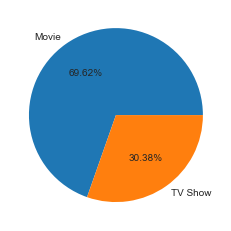

In [9]:
plt.pie(data["type"].value_counts(), labels=data["type"].value_counts().index, autopct='%.2f%%', );

Number of movies is much more than the number of TV shows. Almost 70% of the content is in the form of movies.

#### Movies vs TV Shows Added Each Year

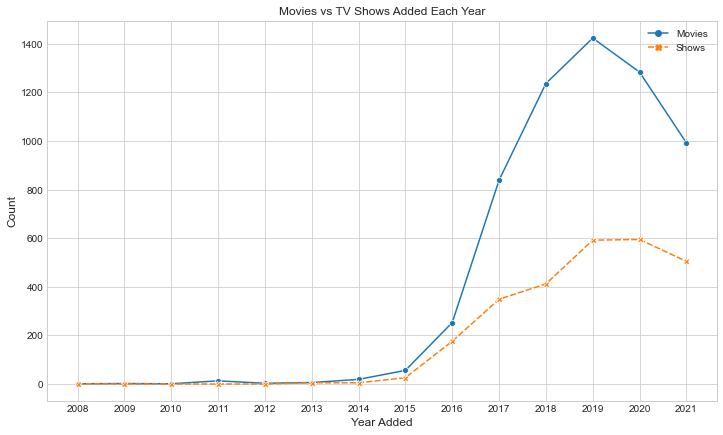

In [10]:
data["date_added"].fillna(pd.to_datetime(dt.date(1900, 1, 1)), inplace=True)
data["month_added"] = data["date_added"].dt.month
data["year_added"] = data["date_added"].dt.year

data_movies = data[data["type"] == "Movie"][["title", "year_added"]]
data_shows = data[data["type"] == "TV Show"][["title", "year_added"]]

count_added = pd.DataFrame(columns = ["Movies", "Shows"])
count_added["Movies"] = data_movies.groupby("year_added").count().iloc[:, 0]
count_added["Shows"] = data_shows.groupby("year_added").count().iloc[1:, 0]
count_added.fillna(0, inplace=True)
count_added = count_added.astype(int)

plt.figure(figsize=(12, 7))
ax = sns.lineplot(data = count_added, markers=True, )
ax.set(xticks=count_added.index)
ax.set_xlabel("Year Added", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_title("Movies vs TV Shows Added Each Year");

More number of movies are added as compared to TV Shows which is consistent with the fact that almost 70% of the content is movie based.However, both 2020 and 2021 saw a decline in the content added. One of the major reasons for this could be the pandemic.

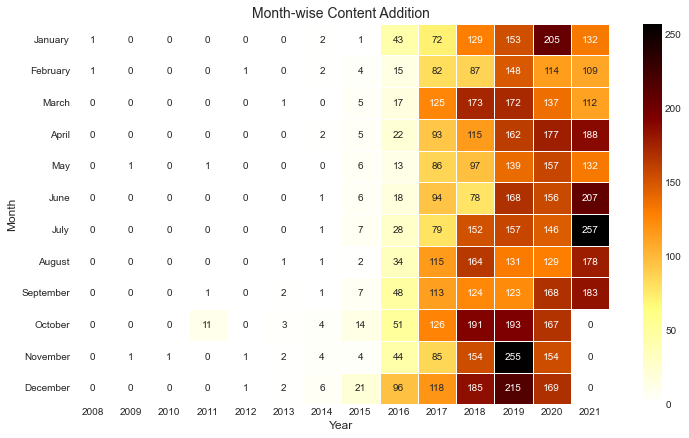

In [11]:
month_wise_count = (data.groupby(["year_added", "month_added"]).count().iloc[1:, -1].unstack().fillna(0).astype(int)).T
month_wise_count.index = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
plt.figure(figsize=(12, 7))
ax = sns.heatmap(data=month_wise_count, cmap='afmhot_r', annot=True, fmt='d', linewidth=0.5)
ax.set_title("Month-wise Content Addition", fontsize=14)
ax.set_ylabel("Month", fontsize=12)
ax.set_xlabel("Year", fontsize=12);

The months of January, June, July, November and December see high addition of content. It might be good to avoid these months for a new release.

#### Average Duration of a Movie or TV Show

In [12]:
data.groupby("type")["duration"].mean()

type
Movie      99.528462
TV Show     1.764948
Name: duration, dtype: float64

On average a movie is ~ 99 minutes long and a TV Show is ~ 2 seasons. 

#### Releases as per Country

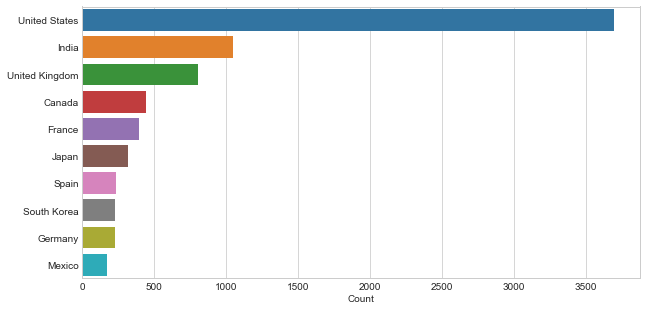

In [13]:
country_release = pd.concat([data.copy(), data['country'].str.split(",", expand=True)], axis=1).melt(id_vars=["type", "title"], value_vars=range(12), value_name="Country")
country_release = country_release[country_release["Country"].notna()]
country_release["Country"] = country_release["Country"].str.strip()

country_count = pd.DataFrame(country_release["Country"].value_counts().sort_values(ascending=False))
country_count.rename(columns={"Country": "Count"}, inplace=True)
country_count.dropna(inplace=True)

plt.figure(figsize=(10, 5))
sns.barplot(data=country_count[:10], y=country_count[:10].index, x='Count');

The top content producing countries are USA, India, UK, Canada and France.

#### Actors with Most Movies/Shows

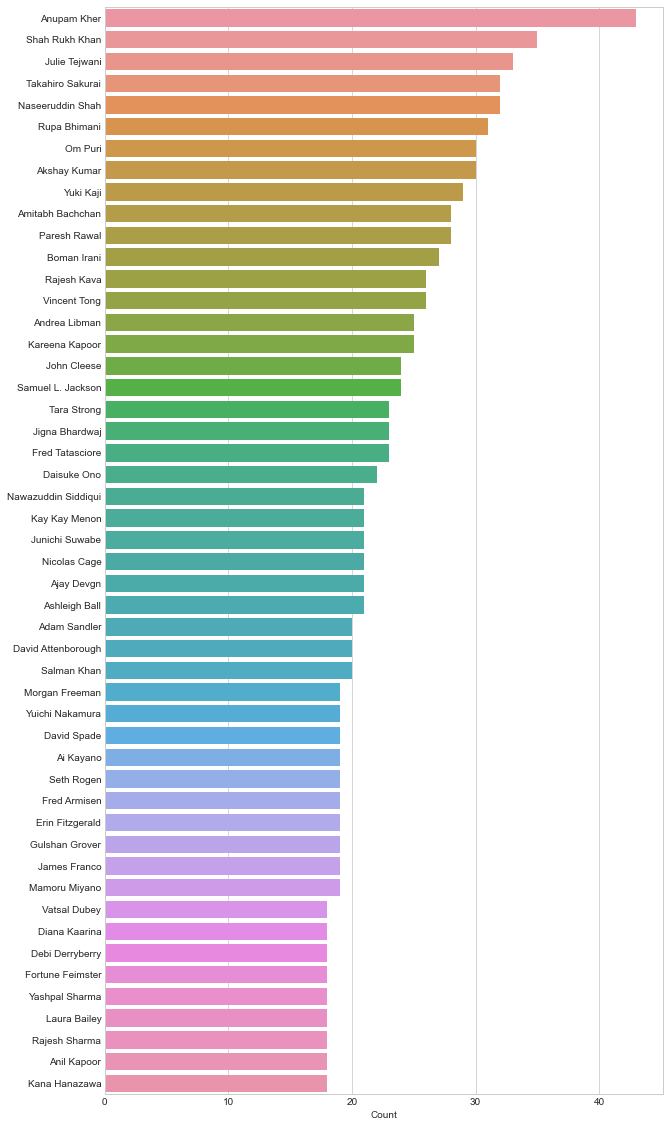

In [14]:
actor = pd.concat([data.copy(), data['cast'].str.split(",", expand=True)], axis=1).melt(id_vars=["type", "title"], value_vars=range(44), value_name="Cast")
actor = actor[actor["Cast"].notna()]
actor["Cast"] = actor["Cast"].str.strip()

actor_count = pd.DataFrame(actor["Cast"].value_counts().sort_values(ascending=False))
actor_count.rename(columns={"Cast": "Count"}, inplace=True)
actor_count.dropna(inplace=True)

plt.figure(figsize=(10, 20))
sns.barplot(data=actor_count[:50], y=actor_count[:50].index, x='Count');

#### Director Movie Count

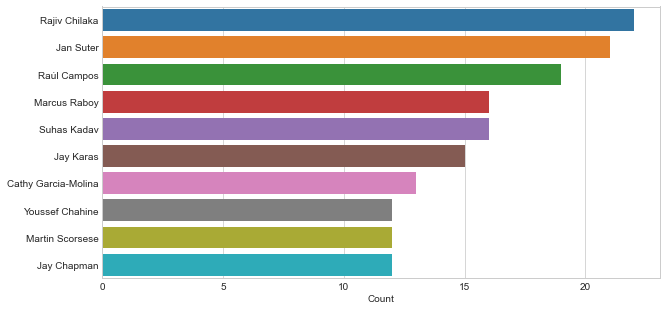

In [15]:
director = pd.concat([data.copy(), data['director'].str.split(",", expand=True)], axis=1).melt(id_vars=["type", "title"], value_vars=range(13), value_name="Director")
director = director[director["Director"].notna()]
director["Director"] = director["Director"].str.strip()

director_count = pd.DataFrame(director["Director"].value_counts().sort_values(ascending=False))
director_count.rename(columns={"Director": "Count"}, inplace=True)
director_count.dropna(inplace=True)

plt.figure(figsize=(10, 5))
sns.barplot(data=director_count[:10], y=director_count[:10].index, x='Count');

#### Top Categories in Movies

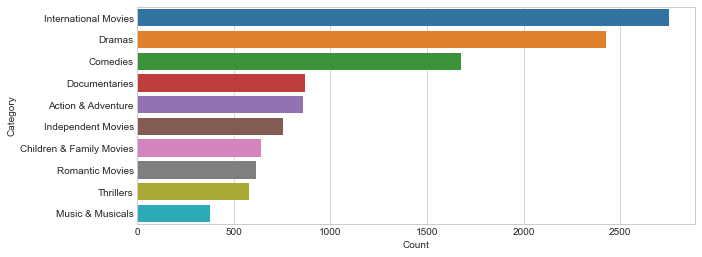

In [16]:
from collections import Counter

data_movies = data[data["type"] == "Movie"]
top_categories = Counter(", ".join(data_movies.copy()['listed_in']).split(", ")).most_common(10)
category = [cat[0] for cat in top_categories]
count = [cat[1] for cat in top_categories]
top_categories_movies = pd.DataFrame({"Category": category, "Count": count})

plt.figure(figsize=(10, 4))
sns.barplot(data=top_categories_movies, y='Category', x='Count');

#### Top Categories in TV Shows

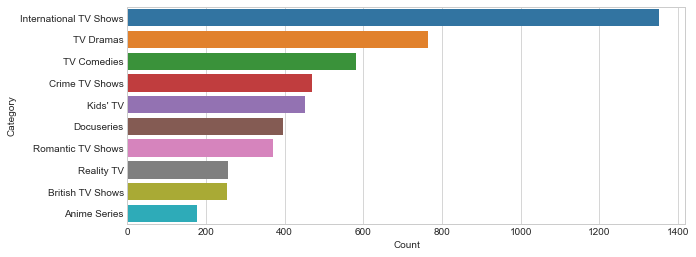

In [17]:
from collections import Counter

data_movies = data[data["type"] == "TV Show"]
top_categories = Counter(", ".join(data_movies.copy()['listed_in']).split(", ")).most_common(10)
category = [cat[0] for cat in top_categories]
count = [cat[1] for cat in top_categories]
top_categories_shows = pd.DataFrame({"Category": category, "Count": count})

plt.figure(figsize=(10, 4))
sns.barplot(data=top_categories_shows, y='Category', x='Count');

### Findings
1. Netflix clearly produces more movies than TV shows. However, we do not have data for the number of episodes in a show and theor duration. These statistics might change if we include that.

2. Following point 1, more movies are added every year. This analysis suffers from the same limitation as point 1.

3. The top content producing countries are USA, India, UK, Canada and France.

### Actionables
1. On average a movie is ~ 99 minutes long and a TV Show is ~ 2 seasons. Good content therefore, should have a similar timeframe. With respect to TV shows, if we have data regarding number of views, the recommended number of seasons may change because many shows might fail after just 2 good seasons, while successful shows, which may be less in number can have more than 2 seasons. The average currently includes all shows.

2. Netflix should focus on efforts on the next top 10 content producing countries. It should incentivize creators in these countries to promote more content. It will help in user base expansion and consequently more revenue.

3. For custom content, it should pair the top directors and actors. The chances of a blockbuster increase with a good combination of creators and actors.

4. From the list of top categories in both movies and TV shows, Netflix should incentivize creators of the genre. Doing so would motivate other content creators to develop more into that space. Contrarily, Netflix can also identify the next top 10 genres in both movies and TV shows and occupy that space (more width than depth).

5. The months of January, June, July, November and December see high addition of content. It might be good to avoid these months for a new release.